Linear Regression:
MSE: 15848.724964553943
R2: 0.7885457714977311

Random Forest Regressor:
MSE: 778.1372725009144
R2: 0.9896180659962528

XGBoost Regressor:
MSE: 362.8970811014425
R2: 0.995158214778687


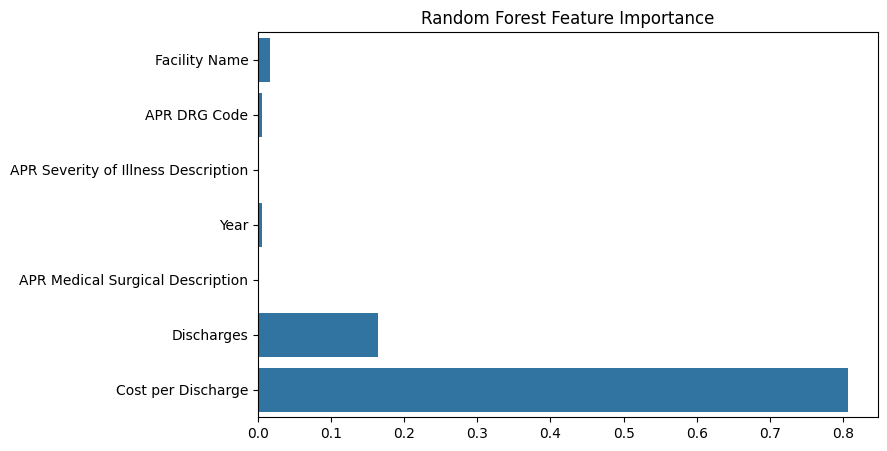

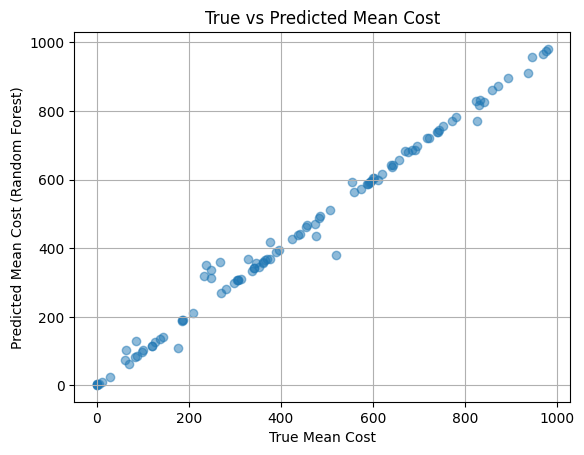

In [ ]:
# 📦 Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Load your cleaned data
df = pd.read_csv('/content/cleaned_data.csv')

# 💥 Step 1: Feature Engineering
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Discharges'] = pd.to_numeric(df['Discharges'], errors='coerce')
df['Mean Cost'] = pd.to_numeric(df['Mean Cost'], errors='coerce')
df['Median Cost'] = pd.to_numeric(df['Median Cost'], errors='coerce')

# Encode categorical variables
df['Facility Name'] = df['Facility Name'].astype('category').cat.codes
df['APR DRG Code'] = pd.to_numeric(df['APR DRG Code'], errors='coerce')
df['APR Severity of Illness Description'] = df['APR Severity of Illness Description'].astype('category').cat.codes
df['APR Medical Surgical Description'] = df['APR Medical Surgical Description'].astype('category').cat.codes

# Create new feature
df['Cost per Discharge'] = df['Mean Cost'] / df['Discharges']

# Drop missing
df = df.dropna()

# 💥 Step 2: Features and Label
features = ['Facility Name', 'APR DRG Code', 'APR Severity of Illness Description', 'Year', 'APR Medical Surgical Description', 'Discharges', 'Cost per Discharge']
X = df[features]
y = df['Mean Cost']

# 💥 Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 💥 Step 4: Train Models

## Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

## Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

## XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=200, max_depth=6, random_state=42, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# 💥 Step 5: Evaluate Models
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2:", r2_score(y_test, y_pred_lr))
print("")

print("Random Forest Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))
print("")

print("XGBoost Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2:", r2_score(y_test, y_pred_xgb))

# 💥 Step 6: Feature Importance (Random Forest)
importances = rf_model.feature_importances_
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title('Random Forest Feature Importance')
plt.show()

# 💥 Step 7: Scatter Plot True vs Predicted
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('True Mean Cost')
plt.ylabel('Predicted Mean Cost (Random Forest)')
plt.title('True vs Predicted Mean Cost')
plt.grid()
plt.show()
